# Анализ базы данных

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Цель проекта:**
- проанализировать базу данных.

**Задания:** 
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

**Описание данных**: 

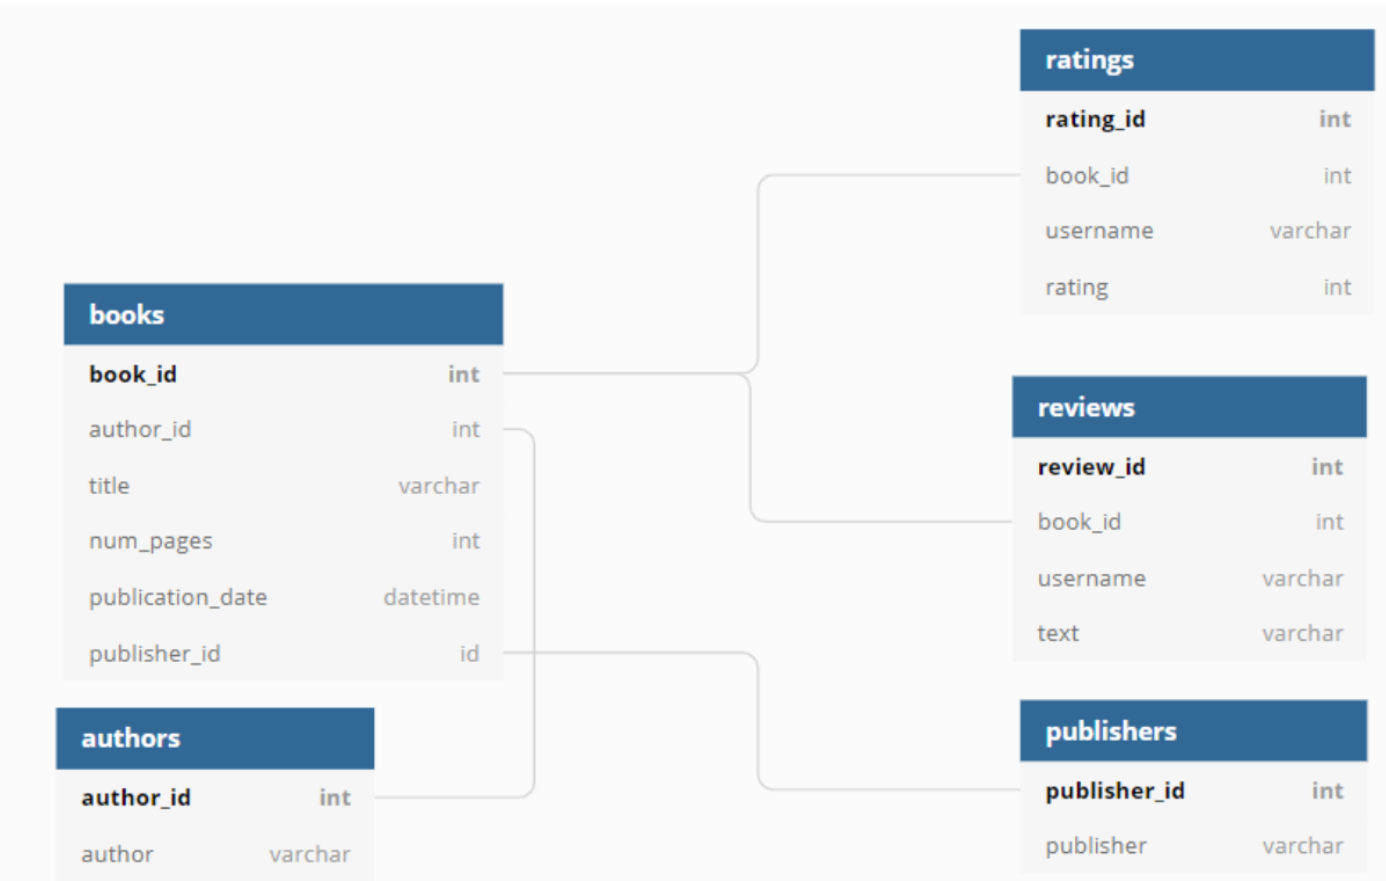

Таблица *books* содержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

Таблица *authors* cодержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

Таблица *publishers* содержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства.


Таблица *ratings* содержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

Таблица *reviews* содержит данные о пользовательских обзорах на книги:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

## Подключение к базе данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': '*****', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

##  Анализ таблиц

Напишем функцию для вывода таблицы по запросу:

In [3]:
def sql(request):
    query = request
    con=engine.connect()
    return pd.io.sql.read_sql(sql=text(query), con = con)

Напишем функцию для изучения таблицы:

In [4]:
def review(df):
    pd.options.display.max_colwidth = 130
    display(df),
    df.info(),
    print('*'*50),
    print(f'Количество явных дубликатов: {df.duplicated().sum()}'),
    print(f'Доля явных дубликатов: {(df.duplicated().sum() / df.shape[0]):.2%}'), 
    print('*'*50),
    print('Статистическая информация о столбцах:'),
    print(df.describe())

### Таблица books

In [5]:
review(sql('''

              SELECT * FROM books

              '''))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
**************************************************
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
**************************************************
Статистическая информация о столбцах:
           book_id    author_id   num_pages  publisher_id
count  1000.000000  1000.000000  1000.00000   1000.000000
mean    500.500000   320.417000   389.11100    171.270000
std     288.819436   181.620172   229.39014     99.082685
min       1.000000     1.000000    14.00000 

Таблица содержит 1000 строк, без явных дубликатов и пропусков.

### Таблица authors

In [6]:
review(sql('''

              SELECT * FROM authors

              '''))

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
**************************************************
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
**************************************************
Статистическая информация о столбцах:
        author_id
count  636.000000
mean   318.500000
std    183.741666
min      1.000000
25%    159.750000
50%    318.500000
75%    477.250000
max    636.000000


Таблица содержит 636 строк, без явных дубликатов и пропусков.

### Таблица publishers

In [7]:
review(sql('''

              SELECT * FROM publishers

              '''))

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
**************************************************
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
**************************************************
Статистическая информация о столбцах:
       publisher_id
count    340.000000
mean     170.500000
std       98.293777
min        1.000000
25%       85.750000
50%      170.500000
75%      255.250000
max      340.000000


Таблица содержит 340 строк, без явных дубликатов и пропусков.

### Таблица ratings

In [9]:
review(sql('''

              SELECT * FROM ratings

              '''))

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
**************************************************
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
**************************************************
Статистическая информация о столбцах:
         rating_id      book_id       rating
count  6456.000000  6456.000000  6456.000000
mean   3228.500000   510.574195     3.928284
std    1863.831001   284.141636     0.943303
min       1.000000     1.000000     1.000000
25%    1614.750000   291.000000     3.000000
50%    3228.500000   506.000000     4.000000
75%    4842.250000   750.000000     5.000000
max    6456.000000  1000.000000     5.000000


Таблица содержит 6456 строк, без явных дубликатов и пропусков.

### Таблица reviews

In [10]:
review(sql('''

              SELECT * FROM reviews

              '''))

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same enter true practice student system.
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy population. Pm vote take. Long born close thought person old. Visit ever school ma...
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone foreign amount within cell. Ball poor hot that kid.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
**************************************************
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
**************************************************
Статистическая информация о столбцах:
         review_id      book_id
count  2793.000000  2793.000000
mean   1397.000000   504.693161
std     806.413976   288.472931
min       1.000000     1.000000
25%     699.000000   259.000000
50%    1397.000000   505.000000
75%    2095.000000   753.000000
max    2793.000000  1000.000000


Таблица содержит 2793 строк, без явных дубликатов и пропусков.

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- наименование столбцов в стилистике *snake_case*;
- без дубликатов и пропусков;
- типы данных соответствуют сохраненным в них значениям.

## Решение задач

### Посчитаем, сколько книг вышло после 1 января 2000 года

In [11]:
sql('''
    SELECT COUNT(book_id) 
    FROM books
    WHERE publication_date > '2000-01-01'
    ''')

,count
0,819


После 1 января 2000 года в БД числится 819 книг.

### Для каждой книги посчитаем количество обзоров и среднюю оценку

In [12]:
sql('''

    SELECT 
        book_id, title,
        COUNT(DISTINCT review_id) AS review_count,
        ROUND(AVG(rating), 2) AS avg_rating
    FROM 
        books b
        LEFT JOIN reviews USING(book_id)
        LEFT JOIN ratings USING(book_id)
    GROUP BY 
        b.book_id
        
    ''')

,book_id,title,review_count,avg_rating
0,1,'Salem's Lot,2,3.67
1,2,1 000 Places to See Before You Die,1,2.50
2,3,13 Little Blue Envelopes (Little Blue Envelope #1),3,4.67
3,4,1491: New Revelations of the Americas Before Columbus,2,4.50
4,5,1776,4,4.00
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.67
996,997,Xenocide (Ender's Saga #3),3,3.40
997,998,Year of Wonders,4,3.20
998,999,You Suck (A Love Story #2),2,4.50


У многих книг 1 и более обзоров, средние оценки варьируются.

### Определим издательство, которое выпустило наибольшее число книг толще 50 страниц (так мы исключим из анализа брошюры)

In [13]:
sql('''

     SELECT 
          p.publisher,
          count(b.book_id) books
     FROM books b
          LEFT JOIN publishers p USING(publisher_id)
     WHERE b.num_pages > 50
     GROUP BY p.publisher
     ORDER BY 2 DESC
     LIMIT 1
     
    ''')

,publisher,books
0,Penguin Books,42


Издательство *Penguin Books* выпустило наибольшее количество книг, 42 книги (толще 50 страниц).

### Определим автора с самой высокой средней оценкой книг — учитывая только книги с 50 и более оценками

In [14]:
sql('''

    WITH t1 AS (
                SELECT 
                     b.book_id
                FROM 
                     books b
                     LEFT JOIN ratings r USING(book_id)
                GROUP BY  b.book_id
                HAVING COUNT(r.rating) >= 50
                )
                
    SELECT 
        author, 
        AVG(rating) avg_rating
    FROM 
         books b
         JOIN t1 USING(book_id)
         LEFT JOIN ratings r USING(book_id)
         LEFT JOIN authors a USING(author_id)
    GROUP BY a.author_id     
    ORDER BY 2 DESC
    LIMIT 1
    
    ''')

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


Автор *J.K. Rowling/Mary GrandPré* получил самую высокую среднюю оценку книг (книги с 50 и более оценками) ~4.29.

### Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [15]:
sql('''

   SELECT
    ROUND(AVG(review_count), 2) AS avg_reviews
    FROM
        (SELECT username,
                COUNT(review_id) AS review_count
        FROM reviews
        WHERE username IN (
                            SELECT username
                            FROM ratings
                            GROUP BY username
                            HAVING COUNT(rating_id) > 48
                            )
        GROUP BY username
        ) AS t1

    ''')

,avg_reviews
0,24.0


Пользователи, которые поставили больше 48 оценок, в среднем написали 24 обзора.

## Выводы

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- изучив 5 таблиц, данные в порядке:
    - наименование столбцов в стилистике *snake_case*;
    - без дубликатов и пропусков;
    - типы данных соответствуют сохраненным в них значениям.
- проанализировав базу данных, мы выяснили:
    - после 1 января 2000 года в БД числится 819 книг;
    - у многих книг 1 и более обзоров, средние оценки варьируются;
    - издательство *Penguin Books* выпустило наибольшее количество книг, 42 книги (толще 50 страниц);
    - автор *J.K. Rowling/Mary GrandPré* получил самую высокую среднюю оценку книг (книги с 50 и более оценками) ~4.29;
    - пользователи, которые поставили больше 48 оценок, в среднем написали 24 обзора.